## Title
##### How does age, capital gain, capital loss and work hours per week affect the income of adults aged 17-90 in the US?

## Introduction

We are trying to determine whether age, capital gain, capital loss and hours per week can predict if an individual makes above or below 50,000 USD per year.

We are using the Adult data set from the UCI Machine Learning Repository.
This dataset was retrieved from the 1994 US Census database.
The dataset has 14 attributes and 48,842 entries.

Our variables of interest are:
- Age: the age of an individual [17,90]
- Capital Gain: a profit from selling an asset in USD
- Capital Loss: a loss from selling an asset in USD
- Hours per Week: how many hours the individual has reported to work in a week

In [5]:
# Preliminary Exploratory Data Analysis
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
## Read in data
adult <- read_delim("data/adult.data.txt", delim=",",col_names=c("age", "workclass", "fnl_wgt","education",
    "education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss",
    "hrs_per_week","native_country","label"))

Parsed with column specification:
cols(
  age = col_double(),
  workclass = col_character(),
  fnl_wgt = col_character(),
  education = col_character(),
  education_num = col_character(),
  marital_status = col_character(),
  occupation = col_character(),
  relationship = col_character(),
  race = col_character(),
  sex = col_character(),
  capital_gain = col_character(),
  capital_loss = col_character(),
  hrs_per_week = col_character(),
  native_country = col_character(),
  label = col_character()
)



In [7]:
## Cleaning and Wrangling
adult_tidy <- adult %>%
    mutate(label=as_factor(label), capital_gain = as.numeric(capital_gain), 
           capital_loss = as.numeric(capital_loss), hrs_per_week = as.numeric(hrs_per_week) ) %>%
    filter_all(all_vars(. != " ?")) %>% #annoying, mention somewhere
    select(age,capital_gain,capital_loss,hrs_per_week,label) 
   
head(adult_tidy)

age,capital_gain,capital_loss,hrs_per_week,label
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
39,2174,0,40,<=50K
50,0,0,13,<=50K
38,0,0,40,<=50K
53,0,0,40,<=50K
28,0,0,40,<=50K
37,0,0,40,<=50K


In [21]:
## Summarize 
num_of_rows_adult <- nrow(adult)
num_of_rows_adult_tidy <- nrow(adult_tidy)

num_of_missing_rows <- num_of_rows_adult - num_of_rows_adult_tidy

adult_tidy %>%
    group_by(label)%>%
    summarize(num_labels=n(), mean_age = mean(age,na.rm = TRUE), mean_cg = mean(capital_gain, na.rm = TRUE), 
              mean_cl = mean(capital_loss, na.rm = TRUE))

cat("Number of rows with missing data: ", num_of_missing_rows)

`summarise()` ungrouping output (override with `.groups` argument)



label,num_labels,mean_age,mean_cg,mean_cl
<fct>,<int>,<dbl>,<dbl>,<dbl>
<=50K,22654,36.60806,148.8938,53.4480
>50K,7508,43.95911,3937.6798,193.7507


Number of rows with missing data:  2399

In [9]:

# some sentences explaining that they determined the ratio for training/test set

In [27]:
# test set
adult_test <- read_delim("data/adult.test.txt", delim=",",col_names=c("age", "workclass", "fnl_wgt","education",
    "education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss",
    "hrs_per_week","native_country","label"))

adult_test_tidy <- adult_test %>%
    mutate(label=as_factor(label), capital_gain = as.numeric(capital_gain), 
           capital_loss = as.numeric(capital_loss), hrs_per_week = as.numeric(hrs_per_week) ) %>%
    filter_all(all_vars(. != " ?")) %>% #annoying, mention somewhere
    select(age,capital_gain,capital_loss,hrs_per_week,label) 

num_of_rows_test <- nrow(adult_test_tidy)

Parsed with column specification:
cols(
  age = col_character(),
  workclass = col_character(),
  fnl_wgt = col_character(),
  education = col_character(),
  education_num = col_character(),
  marital_status = col_character(),
  occupation = col_character(),
  relationship = col_character(),
  race = col_character(),
  sex = col_character(),
  capital_gain = col_character(),
  capital_loss = col_character(),
  hrs_per_week = col_character(),
  native_country = col_character(),
  label = col_character()
)

Warning message:
“1 parsing failure.
row col   expected    actual                  file
  1  -- 15 columns 1 columns 'data/adult.test.txt'
”


[1] 15060

In [32]:
test_percentage <- num_of_rows_test/(num_of_rows_adult_tidy + num_of_rows_test)
training_percentage <- 1 - test_percentage
test_percentage
training_percentage

[1] 0.3330237

[1] 0.6669763

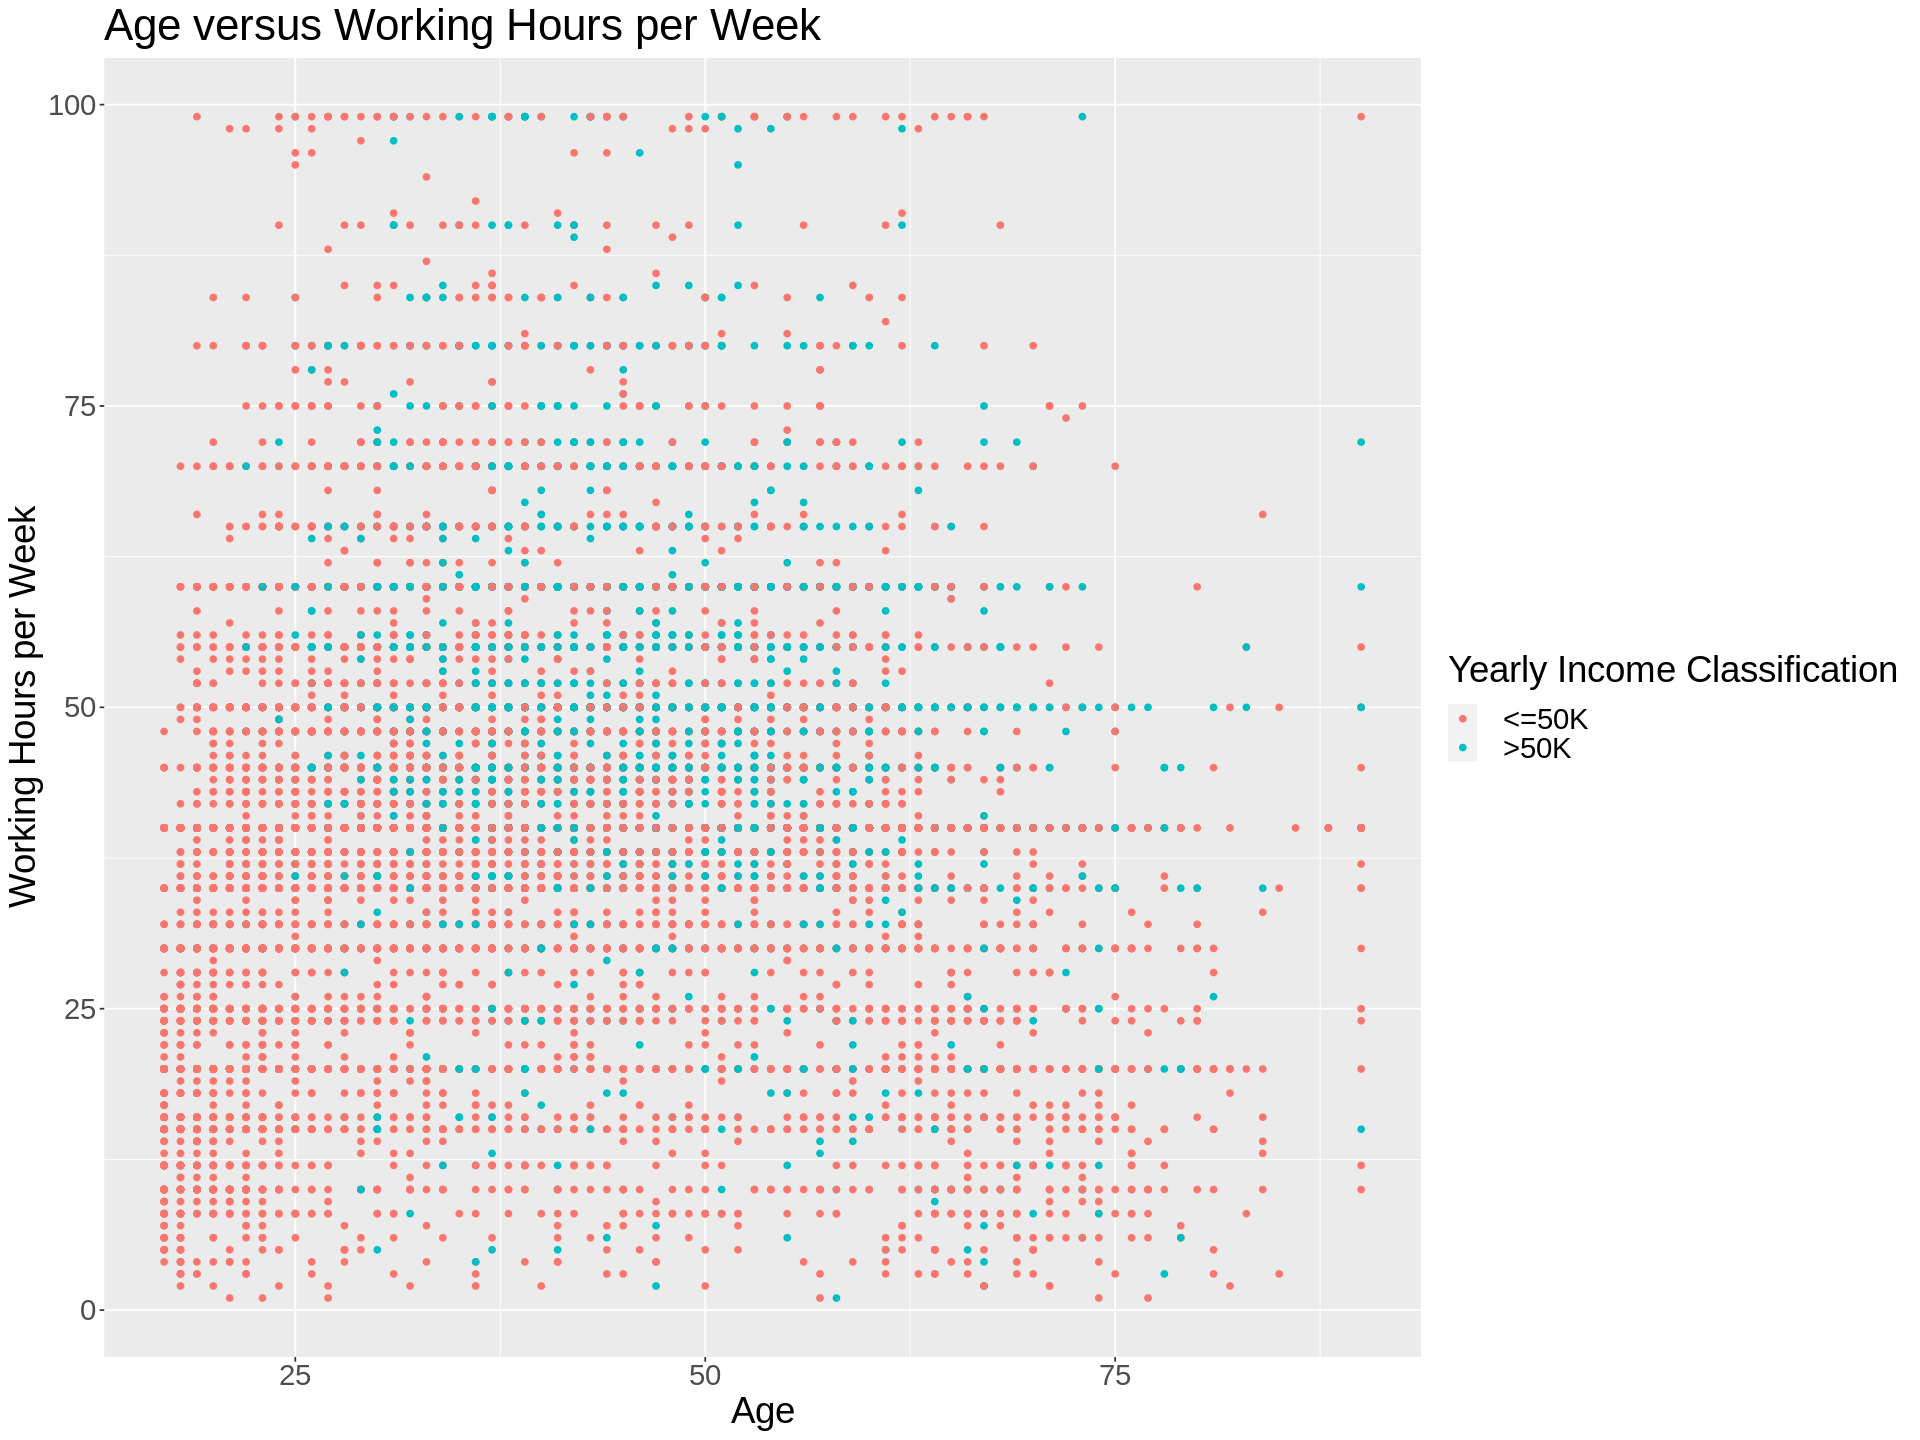

In [37]:
#plot
options(repr.plot.width = 16, repr.plot.height = 12)
adult_data_plot <- ggplot(adult_tidy, aes(x = age, y = hrs_per_week, colour = label)) +
    geom_point() +
    labs(x = "Age", y = "Working Hours per Week", colour = "Yearly Income Classification") +
    ggtitle("Age versus Working Hours per Week") +
    theme(text = element_text(size = 22))

adult_data_plot

We expected people who worked more hours per week to make a higher income. The relationship is not very strong but it appears that people under the age of 25 do not make over 50k a year. As people get older there is not a strong relationship between age and working hours per week. However, there is a cluster of individuals who make over 50k a year and their ages range from approximately 30 t0 60. This is a useful plot because it helps us relate age and working hours to an individuals yearly income. 

Our first step in the data analysis process will be to create a bar graph to determine if capital gains and capital loss determines how much yearly income a person makes. We will also create a scatterplot in order to visualize if there is a relationship between an individuals age and their capital gains. To classify the label we will use the k-nearest neighbours algorithm. To ensure that the classification will be accurate we will use cross validation on our training set. Moreover, we will use mutltiple folds to train our classifier and
We are going to use the following columns to do our data classification
    - age
    - capital_gain
    - capital_loss
    - hrs_per_week
    - label

Expected Outcomes and significance
We expect to find that individuals who have capital gains should make over 50k a year. On the other hand, an individual who has capital losses most likely will not make over 50k a year. We expect younger people to make less than 50k a year. Also, we expect that working hours per week will not be a good predictor because we do not know how much each individual makes per hour. 
Findings from this data analysis could help 